In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/titanic_clean.csv')

In [4]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
75,0,3,male,25.0,0,0,7.6500,S
687,0,3,male,19.0,0,0,10.1708,S
874,1,2,female,28.0,1,0,24.0000,C
522,0,3,male,28.0,0,0,7.2250,C


In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

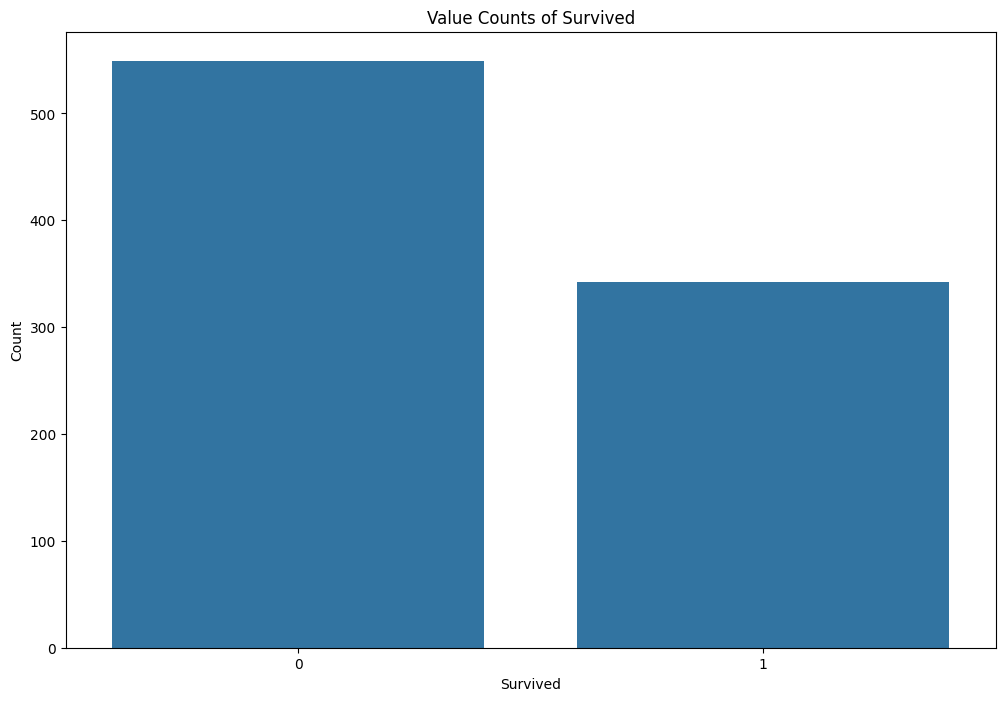

In [6]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [7]:
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()
print(survival_by_class)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


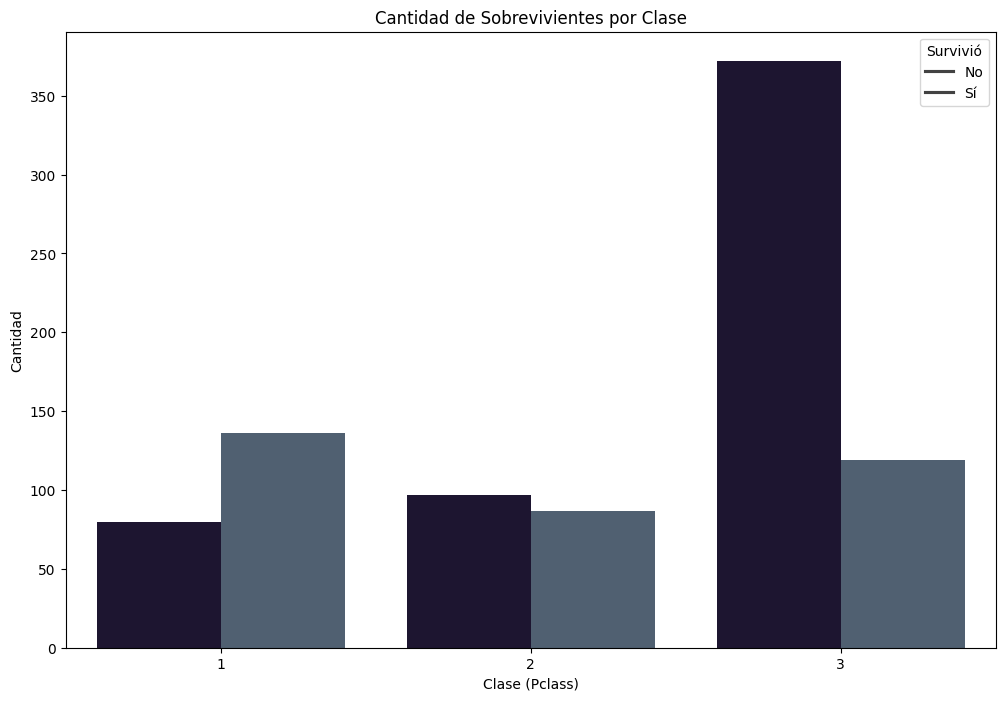

In [9]:
plt.figure(figsize=(12, 8))
plot_df = survival_by_class.reset_index().melt(id_vars='Pclass', 
                                               value_vars=[0, 1],
                                               var_name='Survived',
                                               value_name='Count')
sns.barplot(data=plot_df, 
            x='Pclass', 
            y='Count', 
            hue='Survived',
            palette=['#1b1035', '#4b6076'])

plt.title('Cantidad de Sobrevivientes por Clase')
plt.xlabel('Clase (Pclass)')
plt.ylabel('Cantidad')
plt.legend(title='Survivió', labels=['No', 'Sí'])

plt.show()

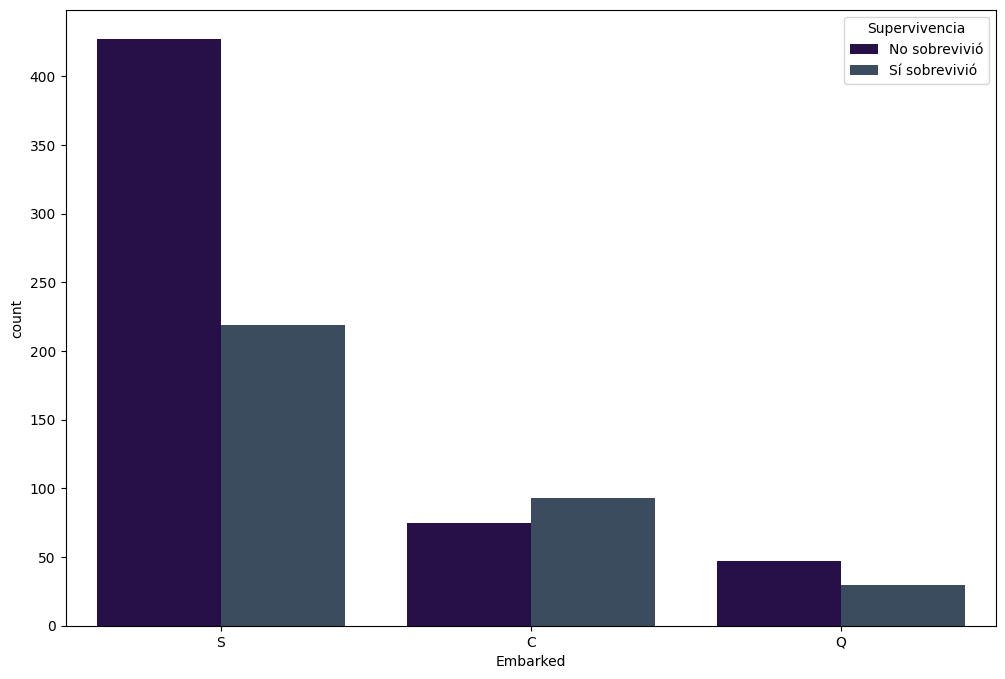

In [11]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

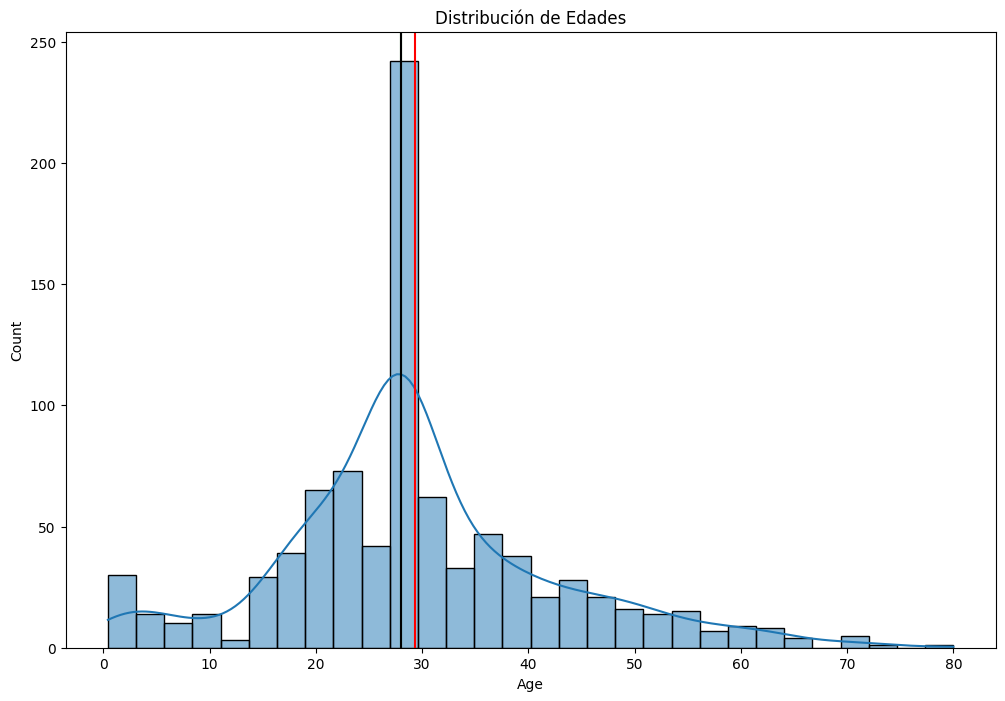

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [10]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

In [18]:
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()
survival_transposed = survival_by_sex.T
print(survival_by_sex)
print(survival_transposed)


Survived    0    1
Sex               
female     81  233
male      468  109
Sex       female  male
Survived              
0             81   468
1            233   109


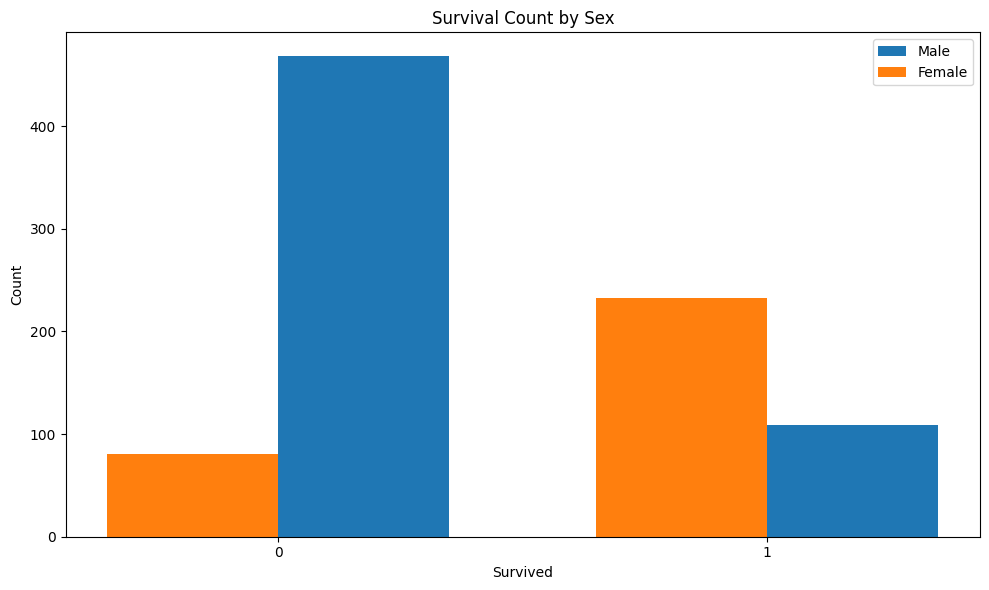

In [20]:
plt.figure(figsize=(10, 6))

# Barras agrupadas
x = range(len(survival_transposed.index))
width = 0.35

plt.bar([p + width/2 for p in x], survival_transposed['male'], width, label='Male')
plt.bar([p - width/2 for p in x], survival_transposed['female'], width, label='Female')

plt.xticks(x, survival_transposed.index)  # 0 y 1 en el eje X
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend()

plt.tight_layout()
plt.show()

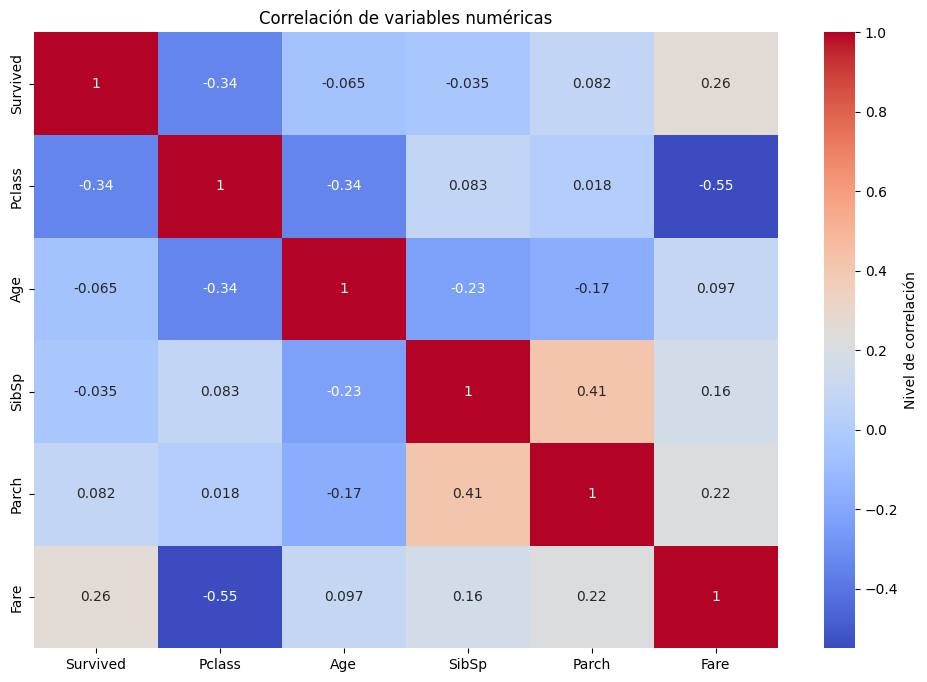

In [21]:
# Matriz de correlación
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

In [ ]:
#Ejercicios.

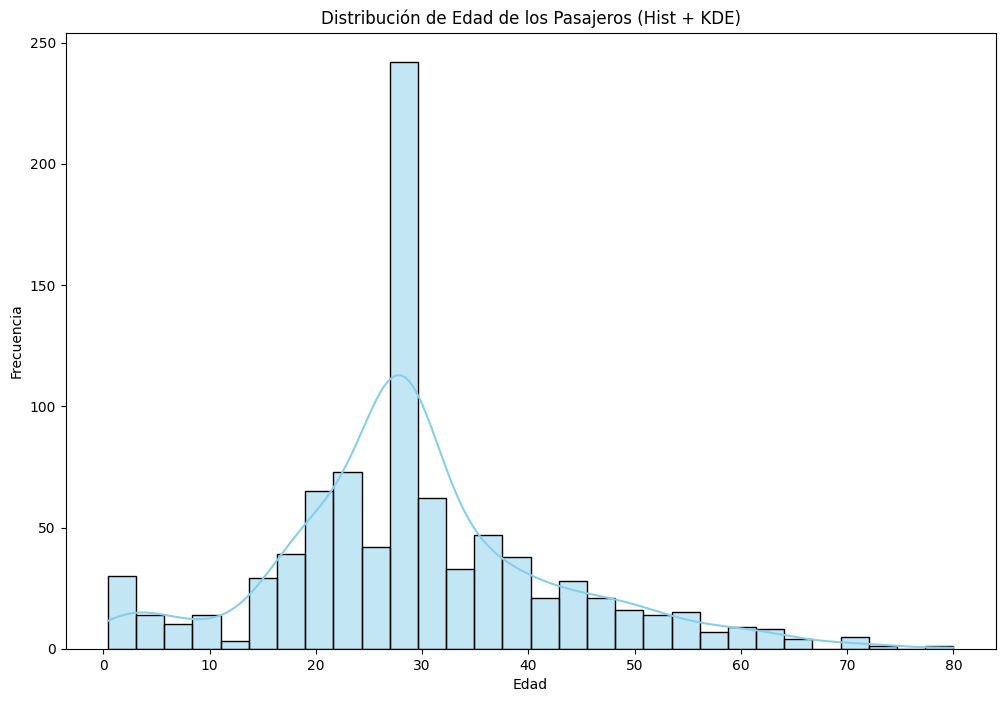

In [23]:
# Crea una gráfica que muestre la distribución de edades de los pasajeros.
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')

plt.title('Distribución de Edad de los Pasajeros (Hist + KDE)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

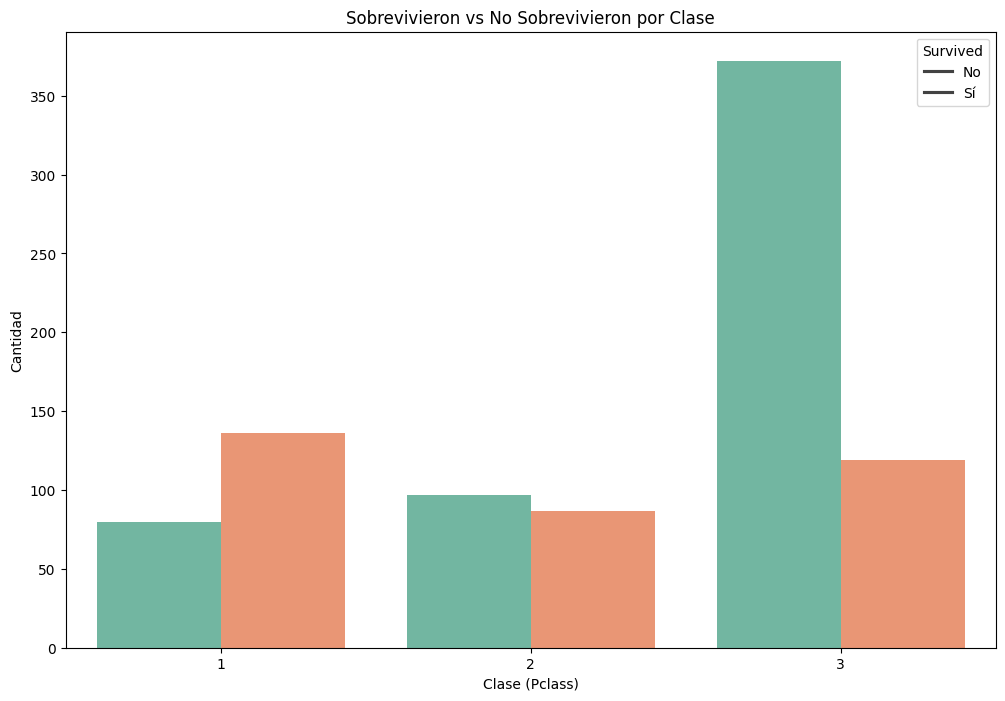

In [30]:
# Crea una gráfica que muestre la cantidad de sobrevivientes por clase de pasajero (Pclass).

plt.figure(figsize=(12, 8))

counts = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

sns.barplot(
    data=counts,
    x='Pclass',
    y='Count',
    hue='Survived',
    palette='Set2'
)

plt.title('Sobrevivieron vs No Sobrevivieron por Clase')
plt.xlabel('Clase (Pclass)')
plt.ylabel('Cantidad')
plt.legend(title='Survived', labels=['No', 'Sí'])
plt.show()

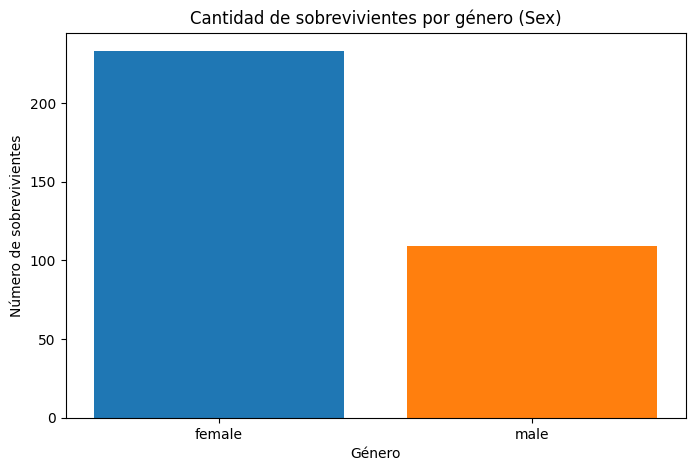

In [31]:
# Crea una gráfica que muestre la cantidad de sobrevivientes por género (Sex).
# Filtrar los sobrevivientes y contar por sexo
survivors_by_sex = df[df["Survived"] == 1]["Sex"].value_counts()

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(survivors_by_sex.index, survivors_by_sex.values, color=['#1f77b4', '#ff7f0e'])
plt.xlabel("Género")
plt.ylabel("Número de sobrevivientes")
plt.title("Cantidad de sobrevivientes por género (Sex)")
plt.show()

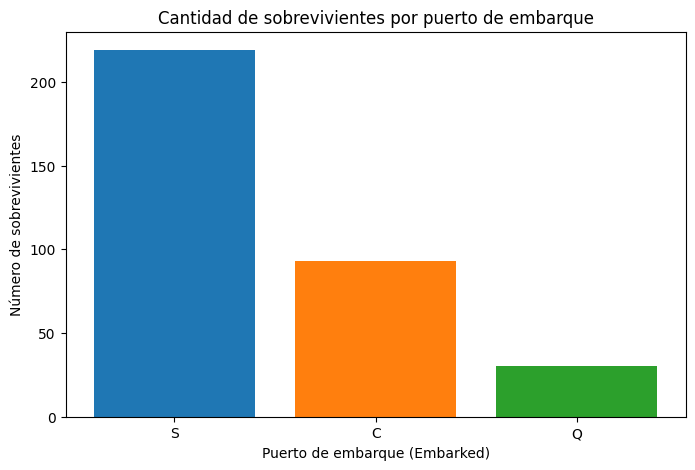

In [32]:
# Crea una gráfica que muestre la cantidad de sobrevivientes por puerto de embarque (Embarked).

# Contar sobrevivientes por puerto de embarque
survivors_by_port = df[df['Survived'] == 1]['Embarked'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(survivors_by_port.index, survivors_by_port.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Puerto de embarque (Embarked)')
plt.ylabel('Número de sobrevivientes')
plt.title('Cantidad de sobrevivientes por puerto de embarque')
plt.show()

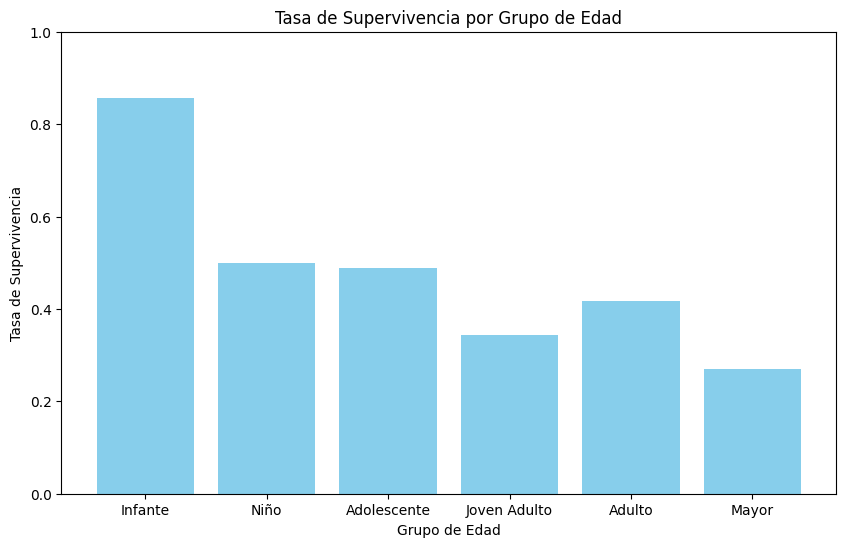

In [37]:
#Agrupa las edades en categorías (Infante, Niño, Adolescente, Joven Adulto, Adulto, Mayor) y crea una gráfica que muestre la tasa de supervivencia por grupo de edad.
# Definir categorías de edad
bins = [0, 2, 12, 18, 35, 60, 120]
labels = ['Infante', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calcular tasa de supervivencia por grupo de edad
survival_rate = df.groupby('AgeGroup', observed=False)['Survived'].mean()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(survival_rate.index, survival_rate.values, color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.ylim(0, 1)
plt.show()

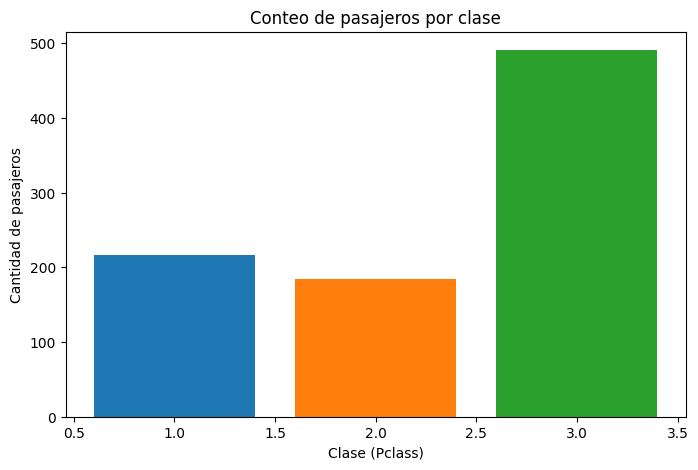

In [39]:
# Crea una gráfica que muestre el conteo de pasajeros en cada clase (Pclass).
counts = df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Clase (Pclass)')
plt.ylabel('Cantidad de pasajeros')
plt.title('Conteo de pasajeros por clase')
plt.show()

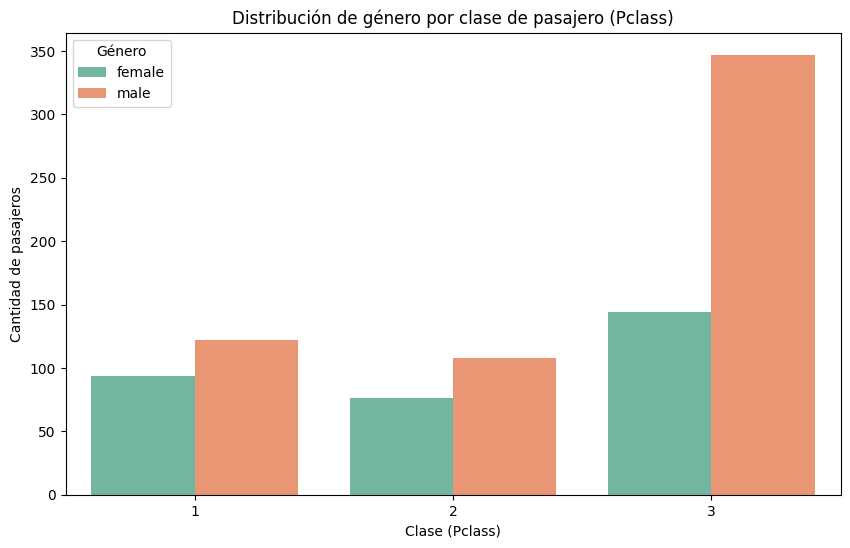

In [40]:
# Crea una gráfica que muestre la distribución de género dentro de cada clase de pasajero (Pclass).
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Pclass', hue='Sex', palette='Set2')

plt.title('Distribución de género por clase de pasajero (Pclass)')
plt.xlabel('Clase (Pclass)')
plt.ylabel('Cantidad de pasajeros')
plt.legend(title='Género')
plt.show()

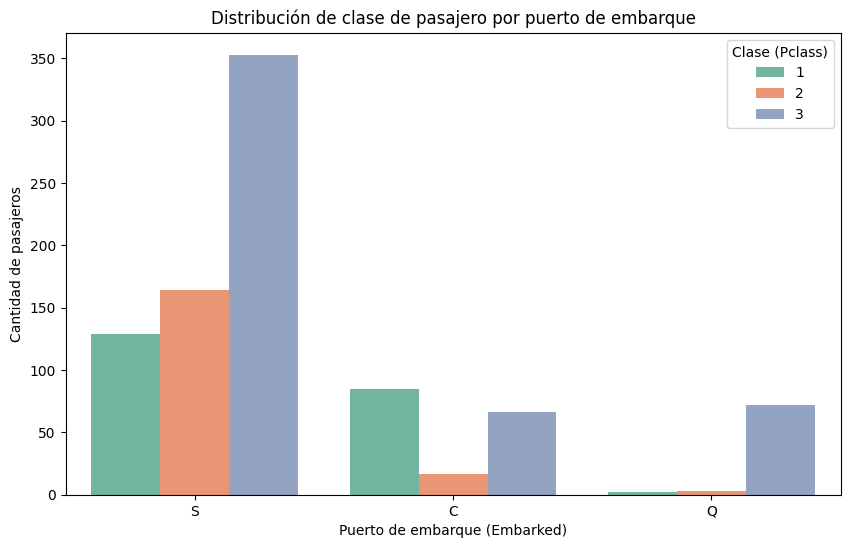

In [41]:
# Crea una gráfica que muestre la distribución de clase de pasajero por puerto de embarque (Embarked).
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Embarked', hue='Pclass', palette='Set2')

plt.title('Distribución de clase de pasajero por puerto de embarque')
plt.xlabel('Puerto de embarque (Embarked)')
plt.ylabel('Cantidad de pasajeros')
plt.legend(title='Clase (Pclass)')
plt.show()

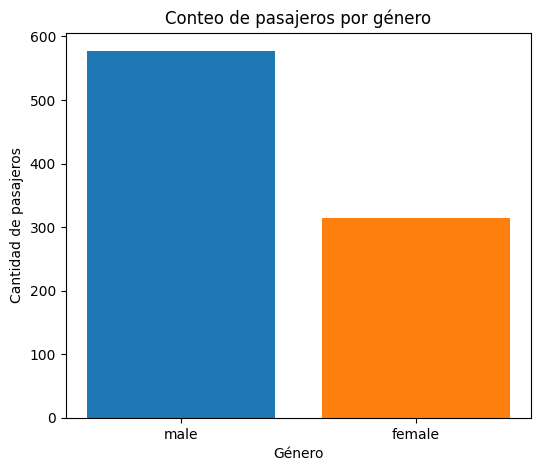

In [43]:
# Crea una gráfica que muestre el conteo de pasajeros por género (Sex).
counts = df['Sex'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Género')
plt.ylabel('Cantidad de pasajeros')
plt.title('Conteo de pasajeros por género')
plt.show()

In [44]:
# Encuentra y muestra los valores máximo y mínimo de la columna de edad.
# Valor máximo de la columna Age
edad_max = df['Age'].max()

# Valor mínimo de la columna Age
edad_min = df['Age'].min()

print(f"Edad máxima: {edad_max}")
print(f"Edad mínima: {edad_min}")

Edad máxima: 80.0
Edad mínima: 0.42


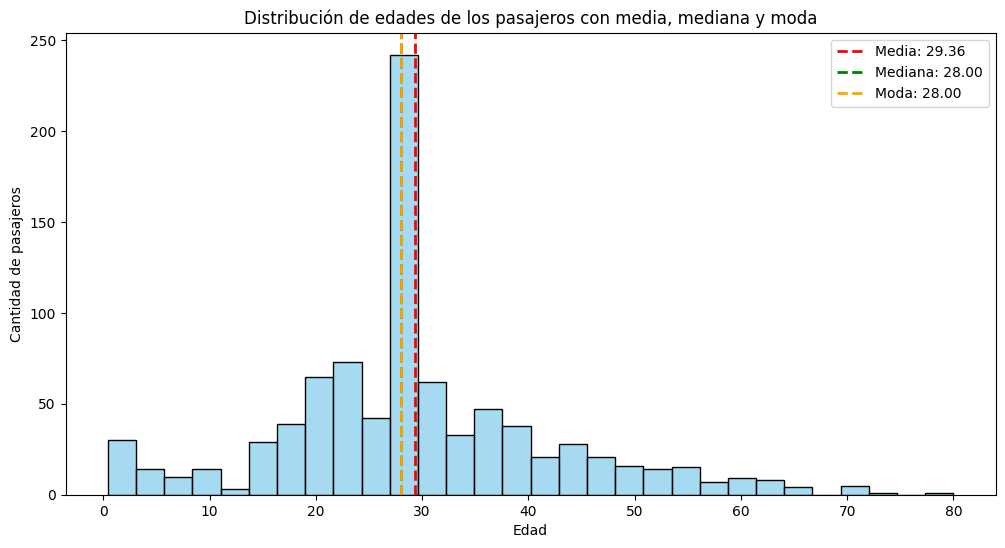

In [46]:
#Crea una gráfica que muestre la distribución de edades, incluyendo líneas verticales que indiquen la media, mediana y moda de las edades.
# Calcular estadísticas
edad_media = df['Age'].mean()
edad_mediana = df['Age'].median()
edad_moda = df['Age'].mode()[0]  # pandas devuelve una serie; tomamos el primer valor

# Crear histograma usando seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Líneas verticales para media, mediana y moda
plt.axvline(edad_media, color='red', linestyle='--', linewidth=2, label=f'Media: {edad_media:.2f}')
plt.axvline(edad_mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {edad_mediana:.2f}')
plt.axvline(edad_moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {edad_moda:.2f}')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de edades de los pasajeros con media, mediana y moda')
plt.legend()
plt.show()

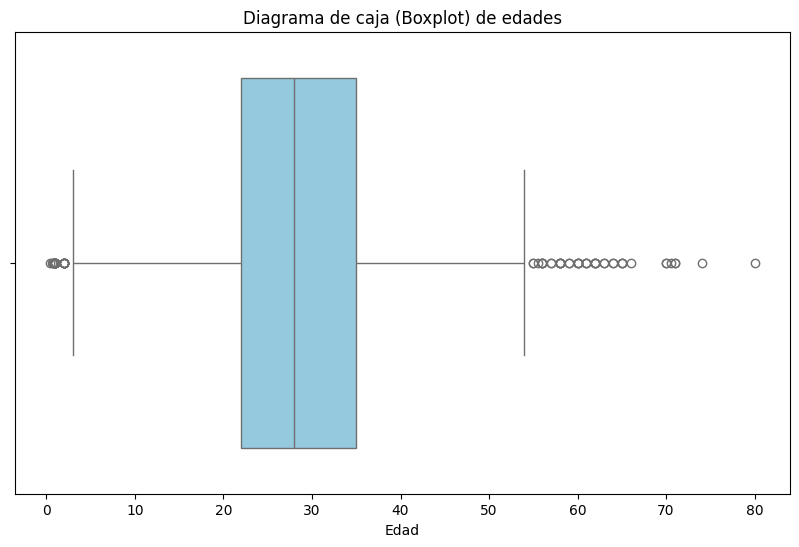

In [47]:
# Crea un diagrama de caja (boxplot) que muestre los outliers en la columna de edad.

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Age'], color='skyblue')

plt.title('Diagrama de caja (Boxplot) de edades')
plt.xlabel('Edad')
plt.show()

In [48]:
# Encuentra y muestra los valores máximo y mínimo de la columna de tarifa (Fare).

# Valor máximo de la columna Fare
fare_max = df['Fare'].max()

# Valor mínimo de la columna Fare
fare_min = df['Fare'].min()

print(f"Tarifa máxima: {fare_max}")
print(f"Tarifa mínima: {fare_min}")

Tarifa máxima: 512.3292
Tarifa mínima: 0.0


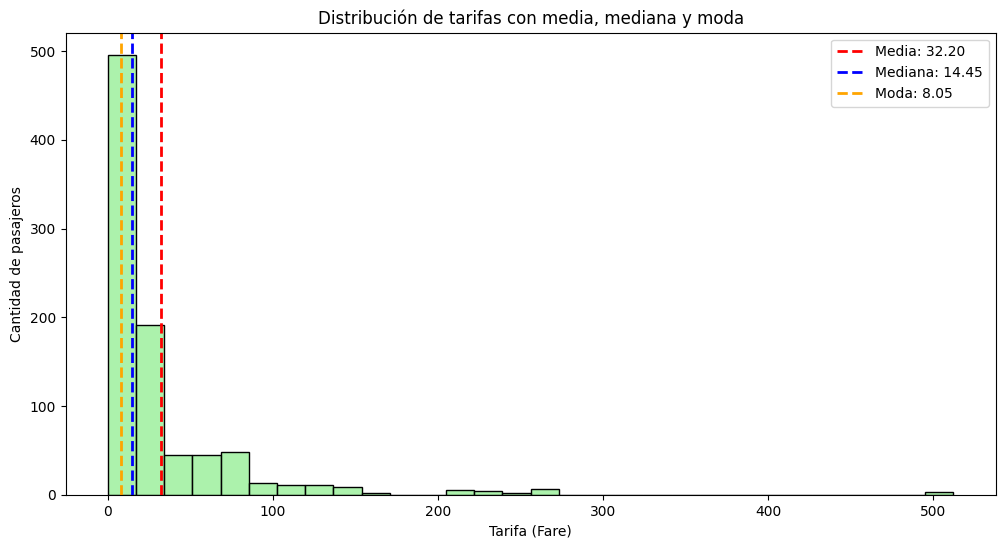

In [50]:
# Crea una gráfica que muestre la distribución de tarifas, incluyendo líneas verticales que indiquen la media, mediana y moda de las tarifas.
# Calcular estadísticas
fare_media = df['Fare'].mean()
fare_mediana = df['Fare'].median()
fare_moda = df['Fare'].mode()[0]  # pandas devuelve una serie; tomamos la primera moda

# Crear histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], bins=30, kde=False, color='lightgreen', edgecolor='black')

# Líneas verticales para media, mediana y moda
plt.axvline(fare_media, color='red', linestyle='--', linewidth=2, label=f'Media: {fare_media:.2f}')
plt.axvline(fare_mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {fare_mediana:.2f}')
plt.axvline(fare_moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {fare_moda:.2f}')

# Etiquetas y título
plt.xlabel('Tarifa (Fare)')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de tarifas con media, mediana y moda')
plt.legend()
plt.show()

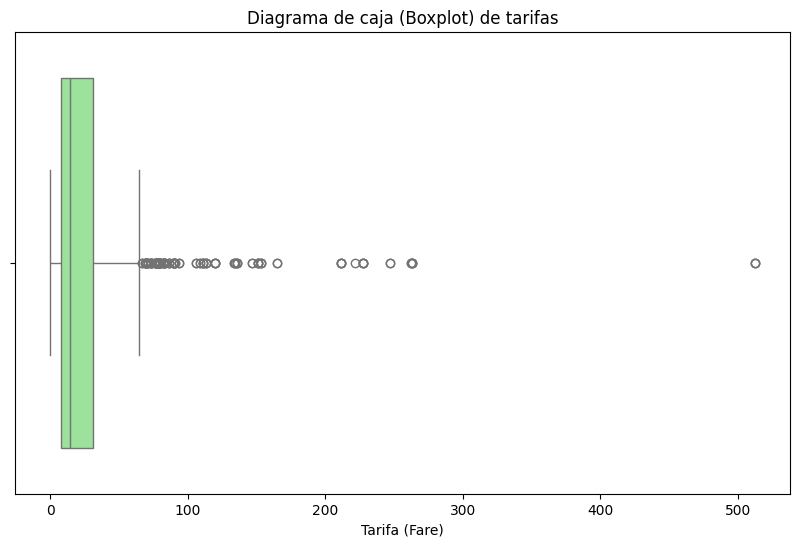

In [51]:
# Crea un diagrama de caja (boxplot) que muestre los outliers en la columna de tarifa (Fare).
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Fare'], color='lightgreen')

plt.title('Diagrama de caja (Boxplot) de tarifas')
plt.xlabel('Tarifa (Fare)')
plt.show()

In [52]:
# Filtra y muestra los datos de los pasajeros que pagaron 0 en tarifa.
pasajeros_fare_cero = df[df['Fare'] == 0]

# Mostrar los resultados
pasajeros_fare_cero

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
179,0,3,male,36.0,0,0,0.0,S,Adulto
263,0,1,male,40.0,0,0,0.0,S,Adulto
271,1,3,male,25.0,0,0,0.0,S,Joven Adulto
277,0,2,male,28.0,0,0,0.0,S,Joven Adulto
302,0,3,male,19.0,0,0,0.0,S,Joven Adulto
413,0,2,male,28.0,0,0,0.0,S,Joven Adulto
466,0,2,male,28.0,0,0,0.0,S,Joven Adulto
481,0,2,male,28.0,0,0,0.0,S,Joven Adulto
597,0,3,male,49.0,0,0,0.0,S,Adulto
633,0,1,male,28.0,0,0,0.0,S,Joven Adulto


<Figure size 1000x600 with 0 Axes>

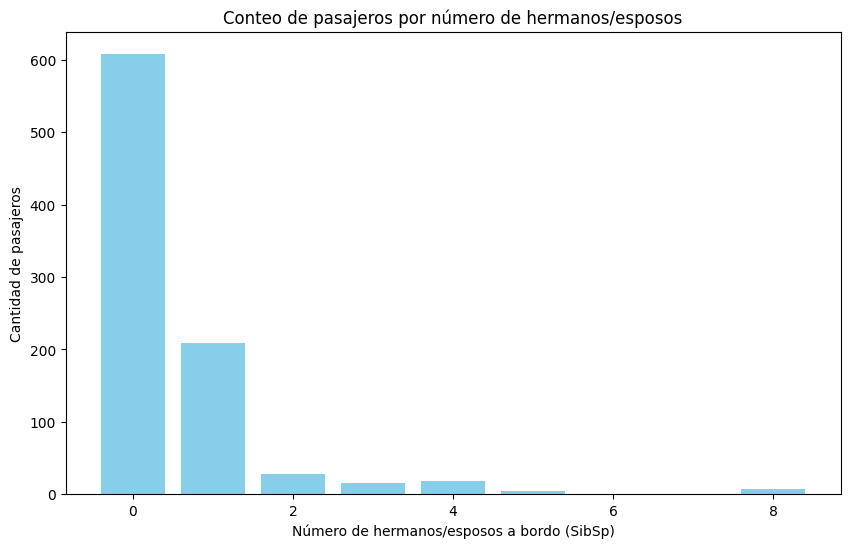

In [54]:
# Crea una gráfica que muestre el conteo de pasajeros por número de hermanos/esposos a bordo (SibSp).
plt.figure(figsize=(10,6))

counts = df['SibSp'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Número de hermanos/esposos a bordo (SibSp)')
plt.ylabel('Cantidad de pasajeros')
plt.title('Conteo de pasajeros por número de hermanos/esposos')
plt.show()

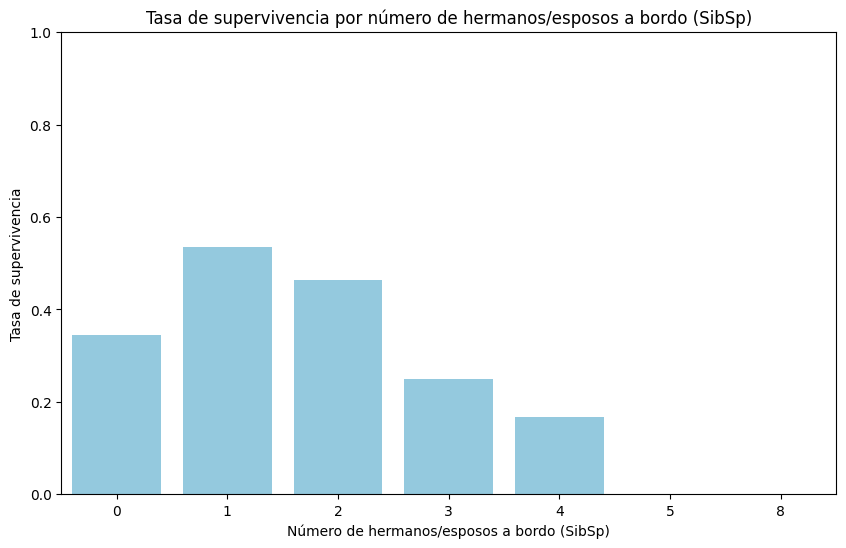

In [55]:
# Crea una gráfica que muestre la tasa de supervivencia basada en el número de hermanos/esposos a bordo (SibSp).
# Calcular la tasa de supervivencia por número de hermanos/esposos
survival_rate_sibsp = df.groupby('SibSp')['Survived'].mean()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=survival_rate_sibsp.index, y=survival_rate_sibsp.values, color='skyblue')

plt.title('Tasa de supervivencia por número de hermanos/esposos a bordo (SibSp)')
plt.xlabel('Número de hermanos/esposos a bordo (SibSp)')
plt.ylabel('Tasa de supervivencia')
plt.ylim(0, 1)  # 0% a 100%
plt.show()

In [56]:
# Calcula y muestra el porcentaje de supervivencia para cada valor de SibSp.
# Calcular porcentaje de supervivencia por SibSp
survival_percentage_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

# Mostrar los resultados
print(survival_percentage_sibsp)

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


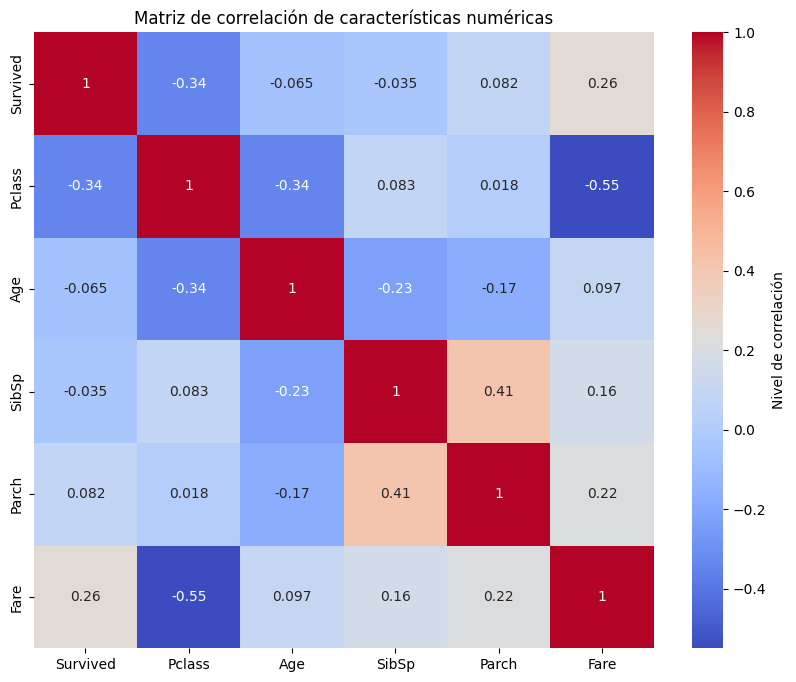

In [57]:
# Crea un mapa de calor (heatmap) que muestre la matriz de correlación de las características numéricas en el dataset.
# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_cols.corr()

# Crear el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Nivel de correlación'})

plt.title('Matriz de correlación de características numéricas')
plt.show()